# 안스콤 사중주 데이터셋

1. 4개의 서로 다른 데이터셋
2. 각 데이터셋은 기본 통계값이 거의 동일함.
3. 하지만 시각화하면 완전히 다른 모양을 보여줌.

단순히 통계 수치만 보는 것만으로는 데이터의 특성을 이해할 수 없음.  
**시각화의 중요성!**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 데이터 Load

In [11]:
anscombe_data = np.load("../data/ch3_anscombe.npy")
print(anscombe_data.shape)
print(anscombe_data[0])

(4, 11, 2)
[[10.    8.04]
 [ 8.    6.95]
 [13.    7.58]
 [ 9.    8.81]
 [11.    8.33]
 [14.    9.96]
 [ 6.    7.24]
 [ 4.    4.26]
 [12.   10.84]
 [ 7.    4.82]
 [ 5.    5.68]]


## 2. 데이터 통계 수치 확인

모두 같은 값을 가지고 있는 것을 확인할 수 있음

In [12]:
stats_df = pd.DataFrame(index=["X_mean", "X_var", "Y_mean", "Y_var", "X&Y_correlation", "X&Y_regression line"])

for i, data in enumerate(anscombe_data):
	dataX = data[:, 0]
	dataY = data[:, 1]

	poly_fit = np.polyfit(dataX, dataY, 1)
	stats_df[f"data{i+1}"] = [
		f"{np.mean(dataX):.2f}",
		f"{np.var(dataX):.2f}",
		f"{np.mean(dataY):.2f}",
		f"{np.var(dataY):.2f}",
		f"{np.corrcoef(dataX, dataY)[0,1]:.2f}",
		f"{poly_fit[1]:.2f} + {poly_fit[0]:.2f}"
		]
	
print(stats_df)

                           data1        data2        data3        data4
X_mean                      9.00         9.00         9.00         9.00
X_var                      10.00        10.00        10.00        10.00
Y_mean                      7.50         7.50         7.50         7.50
Y_var                       3.75         3.75         3.75         3.75
X&Y_correlation             0.82         0.82         0.82         0.82
X&Y_regression line  3.00 + 0.50  3.00 + 0.50  3.00 + 0.50  3.00 + 0.50


## 3. 데이터 시각화

시각화 할 경우 전혀 다른 형태인 것을 확인할 수 있음

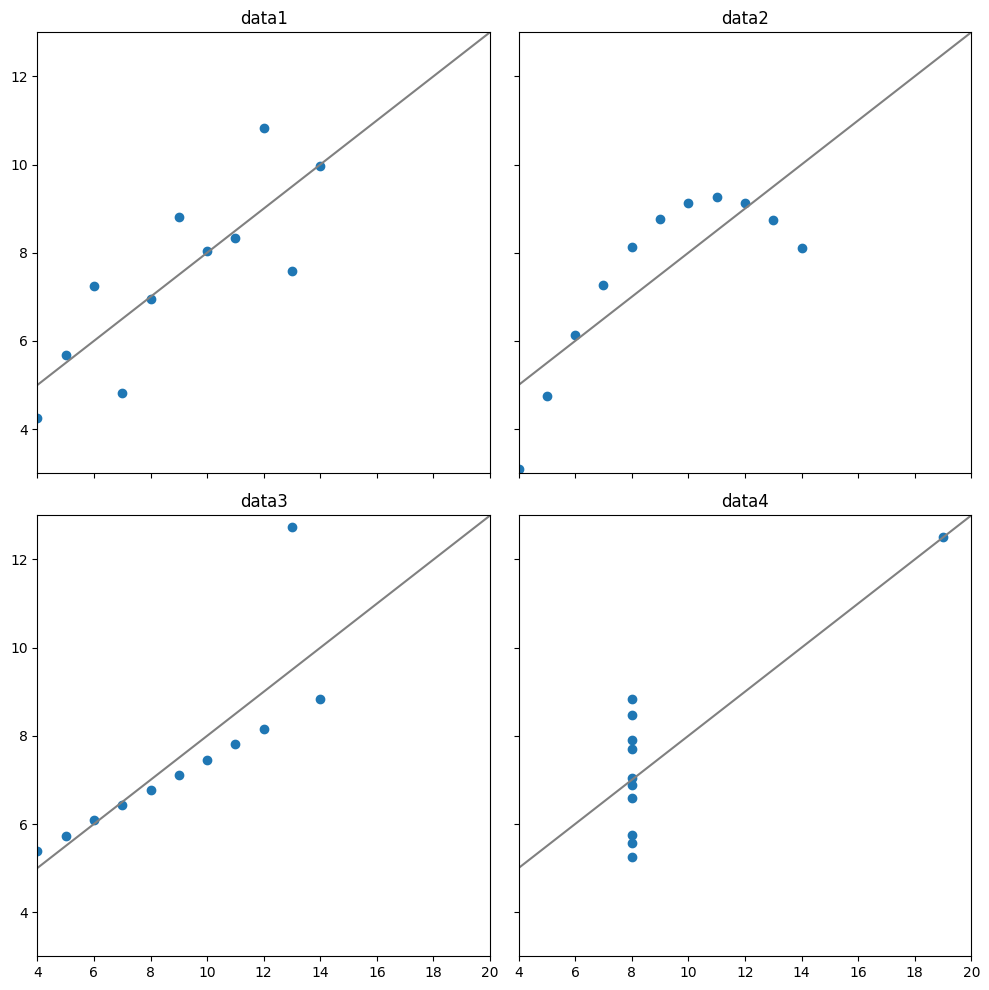

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10), sharex=True, sharey=True)
xs = np.linspace(0,30,100)

for i, data in enumerate(anscombe_data):
	poly_fit = np.polyfit(data[:,0], data[:,1], 1)
	poly_1d = np.poly1d(poly_fit)
	ys = poly_1d(xs)

	ax = axes[i//2, i%2]
	ax.set_xlim([4,20])
	ax.set_ylim([3,13])

	ax.set_title(f"data{i+1}")
	ax.scatter(data[:,0], data[:,1])
	ax.plot(xs,ys, color="gray")

plt.tight_layout()
plt.show()